# POSTTEST 7
## Nama : Muhammad Iffandi
## Nim : 2209106006
# Praktikum : Kecerdasan Buatan A1

## Membuat Folder Train, Test, dan Validation

In [1]:
import splitfolders

In [3]:
splitfolders.ratio("african-wildlife",
                   output="dataset_final",
                   seed=1337,
                   ratio=(.8, .1, .1))

## Import Library ImageDataGenerator untuk melakukan Image Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    brightness_range=[0.9, 1.1],
    vertical_flip= True,
    horizontal_flip= True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1/255
)

## Membuat Arsitektur CNN

In [19]:
train_path = r'C:\Users\Admin\Documents\PRAKTIKUM S3\KB S3\Posttest_KB_7\dataset_final\train'
val_path = r'C:\Users\Admin\Documents\PRAKTIKUM S3\KB S3\Posttest_KB_7\dataset_final\val'

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1224 images belonging to 4 classes.
Found 132 images belonging to 4 classes.


## Melatih Model

### Import Library untuk membuat pre-trained Model

In [20]:
from tensorflow.keras.applications import VGG16

In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 30s 1us/step


### Melatih Model

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [23]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation="softmax")
])

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

## Membuat Fungsi Callback

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [25]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

## Proses Training 

In [26]:
history = model.fit(train_generator, epochs=100,
          validation_data=val_generator,
          verbose=1,
          callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.1325 - accuracy: 0.5016
Epoch 1: val_accuracy improved from -inf to 0.61364, saving model to best_model.h5


C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 223s 6s/step - loss: 1.1325 - accuracy: 0.5016 - val_loss: 0.8903 - val_accuracy: 0.6136 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 0.8692 - accuracy: 0.6364
Epoch 2: val_accuracy improved from 0.61364 to 0.65909, saving model to best_model.h5
39/39 [==============================] - 226s 6s/step - loss: 0.8692 - accuracy: 0.6364 - val_loss: 0.7200 - val_accuracy: 0.6591 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 0.7768 - accuracy: 0.6569
Epoch 3: val_accuracy improved from 0.65909 to 0.69697, saving model to best_model.h5
39/39 [==============================] - 238s 6s/step - loss: 0.7768 - accuracy: 0.6569 - val_loss: 0.6772 - val_accuracy: 0.6970 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 0.7038 - accuracy: 0.7108
Epoch 4: val_accuracy improved from 0.69697 to 0.76515, saving model to best_model.h5
39/39 [=====================

## Membuat Plot hasil dari training model

In [27]:
import matplotlib.pyplot as plt

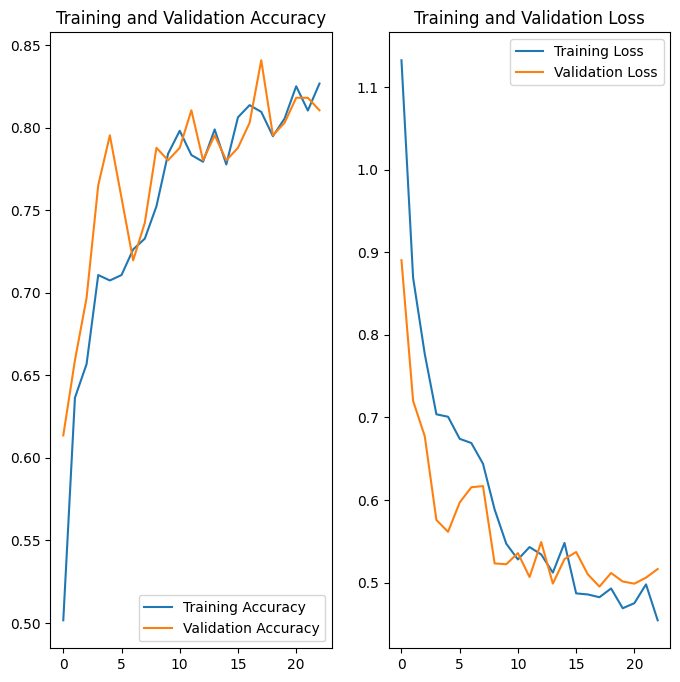

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()